In [20]:
import pandas as pd
!pip install scipy 

     |████████████████████████████████| 34.5 MB 8.8 MB/s eta 0:00:01


In [30]:
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns


     |████████████████████████████████| 294 kB 6.7 MB/s eta 0:00:01


In [3]:
df = pd.read_csv('movie.csv')

In [4]:
df.head()

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012


In [11]:
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


In [15]:
df.isnull().sum()

Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
Profit              5
dtype: int64

In [16]:
duplicates=df.duplicated().sum()
print('Number of duplicate entries:',duplicates)
duplicates=df[df.duplicated(keep=False)]
print(duplicates) 

Number of duplicate entries: 1
      Genre  Rotten Tomatoes  IMDB  Audience Ratings   Budget_M  \
15   Action               58   5.3              2195  47.214594   
100  Action               58   5.3              2195  47.214594   

     Sales Revenue_M Year of Release      Profit  
15        227.081198            1998  179.866604  
100       227.081198            1998  179.866604  


In [17]:
for col in df.select_dtypes(include='object').columns:
    print(f"Value Counts for {col}:\n{df[col].value_counts()}\n")

Value Counts for Genre:
Genre
Action         16
Romance        15
Thriller       15
Comedy         15
Horror         10
Drama           9
Documentary     9
Sci-Fi          7
SciFi           5
Name: count, dtype: int64

Value Counts for Year of Release:
Year of Release
1992         6
1986         5
1998         5
2013         4
2018         4
1985         4
1990         3
1980         3
1999         3
1995         3
2010         3
2009         3
2005         3
2006         3
2012         3
2019         3
2017         3
1981         2
2021         2
2016         2
2023         2
2020         2
1983         2
2001         2
2004         2
1988         2
2008         2
2000         2
2015         2
Year 2001    1
1993         1
2011         1
1989         1
1996         1
Year 1982    1
2007         1
1991         1
2003         1
1982         1
Year 2023    1
2014         1
Year 2008    1
2022         1
Year 2004    1
2002         1
Name: count, dtype: int64



In [32]:
#question 1
invalid_entries=df[df.select_dtypes(include=['number'])<0].count()
print("Invalid Entries:\n", invalid_entries)


Invalid Entries:
 Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     0
Year of Release     0
dtype: int64


In [6]:
#question 2

In [7]:
#question 3

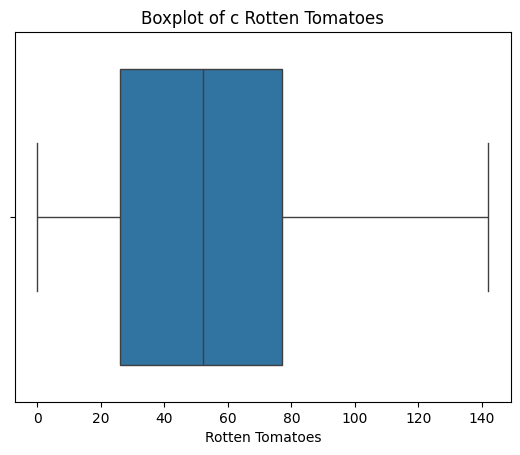

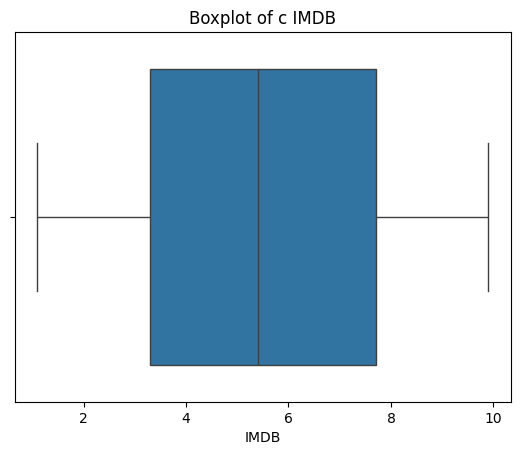

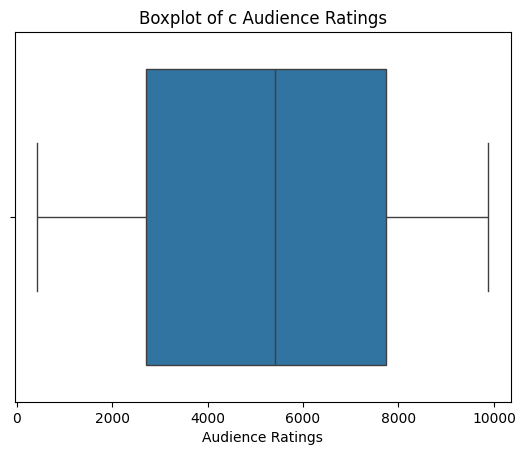

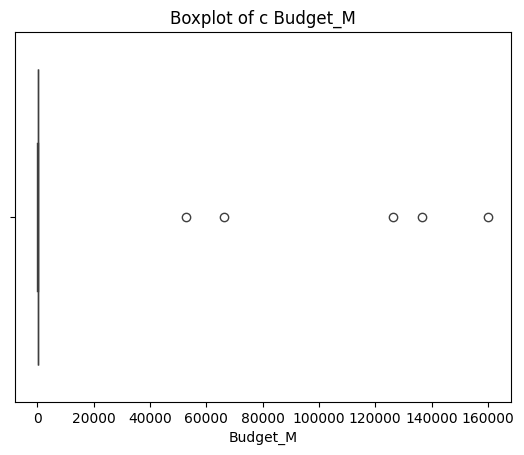

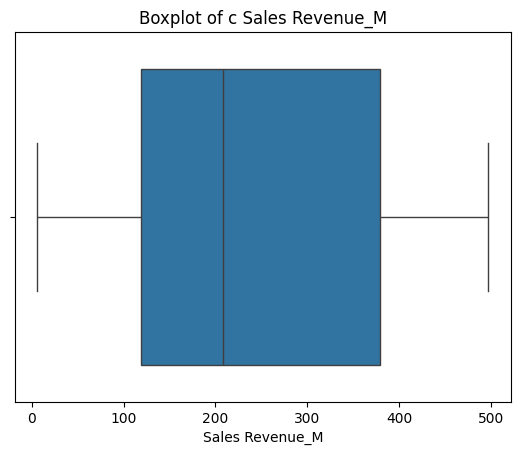

In [33]:
#question 4
for col in df.select_dtypes(include=['number']).columns:
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of c {col}")
  plt.show()

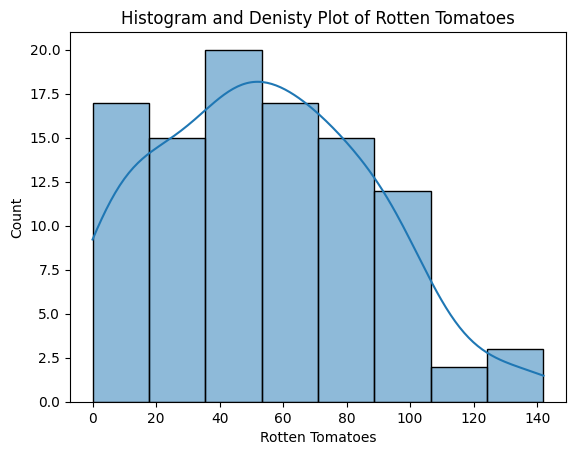

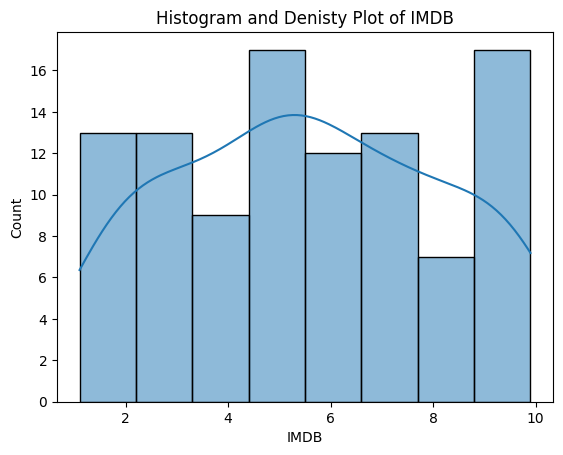

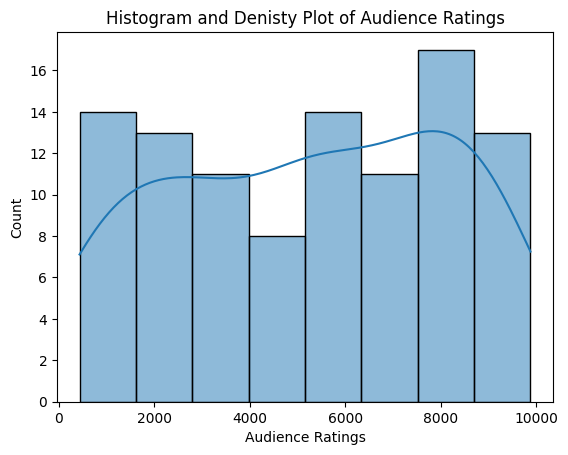

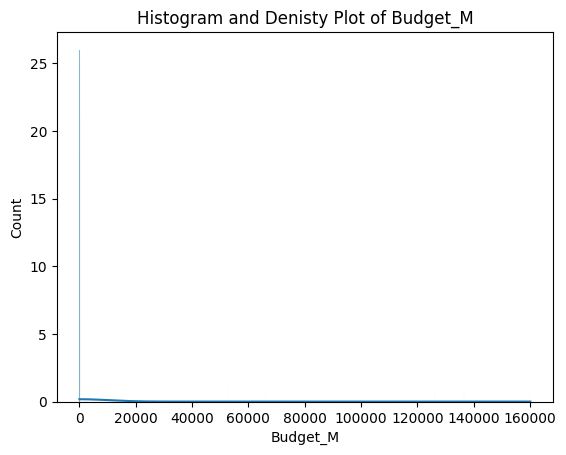

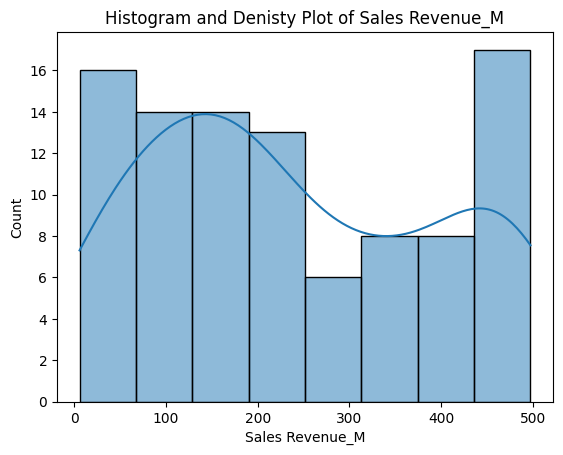

In [34]:
for col in df.select_dtypes(include=['number']).columns:
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram and Denisty Plot of {col}")
  plt.show()

In [27]:
from scipy import stats
df = pd.read_csv("movie.csv")
# Choose the column for which you want to calculate the z-score
column_name = 'Budget_M'  # Ensure this matches the column name in your DataFrame

# Calculate the z-score for the chosen column
z_scores_column = stats.zscore(df[column_name])

# Display the z-scores for the chosen column
print("Z-scores for column '{}':".format(column_name))
print(z_scores_column)

Z-scores for column 'Budget_M':
0     -0.213184
1     -0.215010
2     -0.209609
3     -0.214593
4     -0.212059
         ...   
96    -0.209661
97    -0.214833
98     4.780784
99    -0.212949
100   -0.214259
Name: Budget_M, Length: 101, dtype: float64


In [28]:
mask = z_scores_column > 3
outliers_df = df[mask]
print("Rows with z-scores greater than 3:")
print(outliers_df)

Rows with z-scores greater than 3:
      Genre  Rotten Tomatoes  IMDB  Audience Ratings     Budget_M  \
54  Romance               46   1.1              6930  160159.3810   
65   Horror               10   8.9              1805  136597.1096   
98   Sci-Fi               61   6.5              3057  126150.7894   

    Sales Revenue_M Year of Release  
54       116.313496            2018  
65       116.710128            2023  
98       483.897336            1999  


In [13]:
#question 6
df['Profit'] = df['Sales Revenue_M'] - df['Budget_M']
df.head()

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release,Profit
0,Horror,125,5.0,3968,74.348337,31.356476,2020,-42.991861
1,Romance,84,9.8,8150,28.243154,212.016126,2013,183.772972
2,SciFi,75,2.0,1040,164.601429,129.342033,2017,-35.259396
3,Action,68,7.9,6250,38.779734,424.519154,2019,385.739420
4,Thriller,6,4.7,8356,102.752477,16.652313,2012,-86.100164
